In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
import numpy as np
from google.colab import files
from keras.preprocessing import image


In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
file_name = 'horse-or-human.zip'
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)



('horse-or-human.zip', <http.client.HTTPMessage at 0x7f9c4e8b86d0>)

In [ ]:
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    training_dir, target_size=(300,300), class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',
                           input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
resumen = model.fit_generator(train_generator, epochs=20)

<ipython-input-9-3ce8f866d9f9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resumen = model.fit_generator(train_generator, epochs=20)


Epoch 1/20
33/33 [==============================] - 21s 291ms/step - loss: 0.7860 - accuracy: 0.6806
Epoch 2/20
33/33 [==============================] - 8s 254ms/step - loss: 0.3694 - accuracy: 0.8715
Epoch 3/20
33/33 [==============================] - 8s 238ms/step - loss: 0.2477 - accuracy: 0.9367
Epoch 4/20
33/33 [==============================] - 8s 243ms/step - loss: 0.0663 - accuracy: 0.9727
Epoch 5/20
33/33 [==============================] - 8s 255ms/step - loss: 0.1378 - accuracy: 0.9659
Epoch 6/20
33/33 [==============================] - 8s 228ms/step - loss: 0.3855 - accuracy: 0.9718
Epoch 7/20
33/33 [==============================] - 8s 250ms/step - loss: 0.4327 - accuracy: 0.9533
Epoch 8/20
33/33 [==============================] - 9s 257ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 9/20
33/33 [==============================] - 9s 273ms/step - loss: 0.1170 - accuracy: 0.9873
Epoch 10/20
33/33 [==============================] - 8s 228ms/step - loss: 0.0043 - accuracy: 1.000

In [ ]:
validation_url = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
validation_file_name = 'validation-horse-or-human.zip'
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)



('validation-horse-or-human.zip', <http.client.HTTPMessage at 0x7f9bc0d37fa0>)

In [ ]:
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = train_datagen.flow_from_directory(validation_dir, target_size=(300,300), class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
resumen = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

<ipython-input-14-2933b03a7cf2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resumen = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)


Epoch 1/20
33/33 [==============================] - 10s 317ms/step - loss: 5.1789e-09 - accuracy: 1.0000 - val_loss: 9.4231 - val_accuracy: 0.8242
Epoch 2/20
33/33 [==============================] - 9s 288ms/step - loss: 1.0135 - accuracy: 0.9669 - val_loss: 6.6308 - val_accuracy: 0.7695
Epoch 3/20
33/33 [==============================] - 10s 289ms/step - loss: 5.0231e-04 - accuracy: 1.0000 - val_loss: 4.2811 - val_accuracy: 0.8359
Epoch 4/20
33/33 [==============================] - 10s 315ms/step - loss: 1.0735e-05 - accuracy: 1.0000 - val_loss: 4.4619 - val_accuracy: 0.8359
Epoch 5/20
33/33 [==============================] - 10s 291ms/step - loss: 5.2599e-06 - accuracy: 1.0000 - val_loss: 4.7454 - val_accuracy: 0.8320
Epoch 6/20
33/33 [==============================] - 9s 276ms/step - loss: 1.9398e-06 - accuracy: 1.0000 - val_loss: 5.2543 - val_accuracy: 0.8281
Epoch 7/20
33/33 [==============================] - 10s 292ms/step - loss: 5.3409e-07 - accuracy: 1.0000 - val_loss: 6.5552 

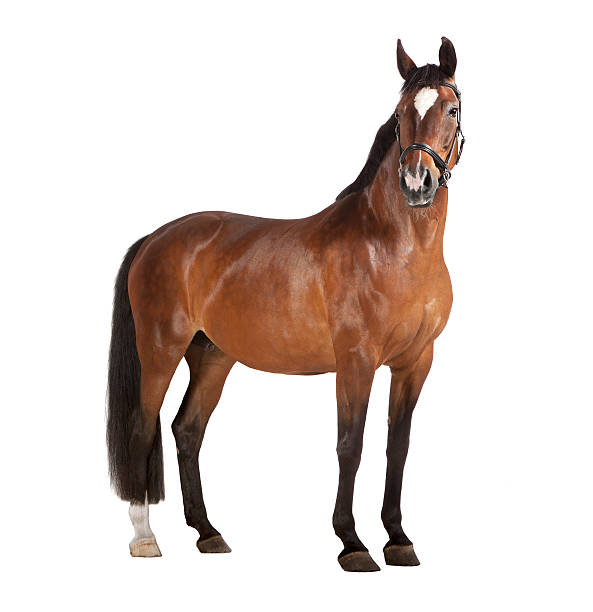

In [ ]:
from PIL import Image

path = '/content/ExampleHorse.jpg'
image = Image.open(path)
image.show()


In [ ]:
from PIL import Image

img = Image.open(path).convert('RGB')
img = img.resize((300, 300))
x = np.expand_dims(np.array(img), axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

if classes[0] > 0.5:
    print(path + " is a human")
else:
    print(path + " is a horse")


1/1 [==============================] - 0s 20ms/step
[0.]
/content/ExampleHorse.jpg is a horse
